In [1]:
import numpy as N
import numpy.random as NR
import pandas
import tqdm
import matplotlib.pyplot as pyplot
import seaborn

seaborn.set_style('whitegrid')

import tqdm
import torch as T
import torch.distributions as TD
import torch.distributions.constraints as TDC
import torch.nn as TN
import torch.nn.functional as TNF
import pyro as P
import pyro.infer as PI
import pyro.optim as PO
import pyro.distributions as PD
import pyro.nn as PN

P.set_rng_seed(0)

In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')
import igg
import model
import guide

all_dependencies x1 ['x2', 'obs']
all_dependencies x21 ['x2', 'x22']
all_dependencies x22 ['x2']
all_dependencies x11 ['x1', 'x12']
all_dependencies x12 ['x1']
all_dependencies x2 ['obs']
all_dependencies x1 ['x2', 'obs']
all_dependencies x21 ['x2', 'x22']
all_dependencies x22 ['x2']
all_dependencies x11 ['x1', 'x12']
all_dependencies x12 ['x1']
all_dependencies x12 ['x1']
all_dependencies x21 ['x2', 'x22']
all_dependencies x11 ['x1', 'x12']
all_dependencies x11 ['x1', 'x12']
all_sets [(0,)]
input_ordering [0]
out_sets [(0,)]
out_orderings [0]
hid_orderings size 8
num hid layers: 1
expanded_input_ordering size 1
expanded_output_ordering size 2
all_sets [(0,), (0, 1), (1,)]
input_ordering [0, 2]
out_sets [(0, 1), (1,)]
out_orderings [1, 2]
hid_orderings size 16
num hid layers: 1
expanded_input_ordering size 2
expanded_output_ordering size 4
all_sets [(0,), (1,), (1, 2), (2,)]
input_ordering [0, 1, 3]
out_sets [(0,), (1, 2)]
out_orderings [0, 2]
hid_orderings size 20
num hid layers: 1
ex

In [3]:
def draw():
    return float(NR.normal(0.0, 4.0, (1,)).astype('float32'))

100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [09:37<00:00,  4.33it/s]


<AxesSubplot:xlabel='step', ylabel='loss'>

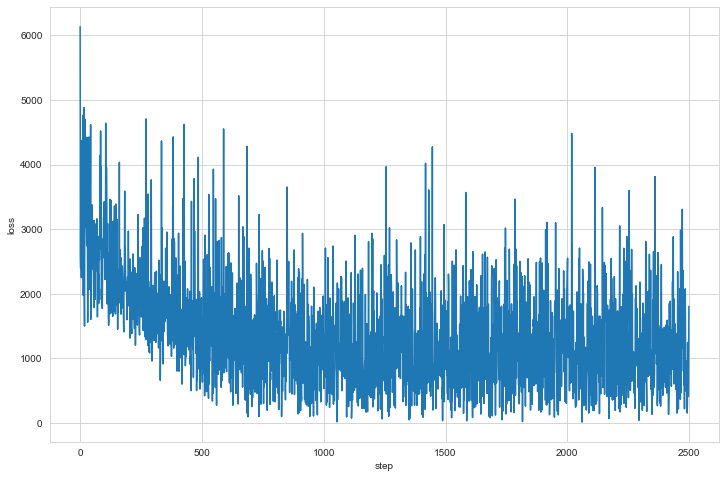

In [4]:
P.clear_param_store()
svi = PI.SVI(model=model.model,
            guide=guide.model,
            optim=PO.Adam({'lr': 1e-3}),
             loss=PI.Trace_ELBO()
            )
hist = pandas.DataFrame(columns=["step", "loss"])
T.autograd.set_detect_anomaly(True) 
for step in tqdm.trange(2500):
    obs = draw()
    loss = svi.step(obs)
    hist = hist.append({
        "step": step,
        "loss": loss,
    }, ignore_index=True)

fig, ax = pyplot.subplots(figsize=(12,8))
seaborn.lineplot(x="step", y="loss", data=hist, ax=ax)